# SQLAlchemy Homework - Surfs Up!

### Before You Begin

1. Create a new repository for this project called `sqlalchemy-challenge`. **Do not add this homework to an existing repository**.

2. Clone the new repository to your computer.

3. Add your Jupyter notebook and `app.py` to this folder. These will be the main scripts to run for analysis.

4. Push the above changes to GitHub or GitLab.

![surfs-up.png](Images/surfs-up.png)

Congratulations! You've decided to treat yourself to a long holiday vacation in Honolulu, Hawaii! To help with your trip planning, you need to do some climate analysis on the area. The following outlines what you need to do.

## Step 1 - Climate Analysis and Exploration

To begin, use Python and SQLAlchemy to do basic climate analysis and data exploration of your climate database. All of the following analysis should be completed using SQLAlchemy ORM queries, Pandas, and Matplotlib.

* Use the provided [starter notebook](climate_starter.ipynb) and [hawaii.sqlite](Resources/hawaii.sqlite) files to complete your climate analysis and data exploration.

* Choose a start date and end date for your trip. Make sure that your vacation range is approximately 3-15 days total.

* Use SQLAlchemy `create_engine` to connect to your sqlite database.

* Use SQLAlchemy `automap_base()` to reflect your tables into classes and save a reference to those classes called `Station` and `Measurement`.

### Precipitation Analysis

* Design a query to retrieve the last 12 months of precipitation data.

* Select only the `date` and `prcp` values.

* Load the query results into a Pandas DataFrame and set the index to the date column.

* Sort the DataFrame values by `date`.

* Plot the results using the DataFrame `plot` method.

  ![precipitation](Images/precipitation.png)

* Use Pandas to print the summary statistics for the precipitation data.

### Station Analysis

* Design a query to calculate the total number of stations.

* Design a query to find the most active stations.

  * List the stations and observation counts in descending order.

  * Which station has the highest number of observations?

  * Hint: You will need to use a function such as `func.min`, `func.max`, `func.avg`, and `func.count` in your queries.

* Design a query to retrieve the last 12 months of temperature observation data (TOBS).

  * Filter by the station with the highest number of observations.

  * Plot the results as a histogram with `bins=12`.

    ![station-histogram](Images/station-histogram.png)

- - -

## Step 2 - Climate App

Now that you have completed your initial analysis, design a Flask API based on the queries that you have just developed.

* Use Flask to create your routes.

### Routes

* `/`

  * Home page.

  * List all routes that are available.

* `/api/v1.0/precipitation`

  * Convert the query results to a dictionary using `date` as the key and `prcp` as the value.

  * Return the JSON representation of your dictionary.

* `/api/v1.0/stations`

  * Return a JSON list of stations from the dataset.

* `/api/v1.0/tobs`
  * Query the dates and temperature observations of the most active station for the last year of data.
  
  * Return a JSON list of temperature observations (TOBS) for the previous year.

* `/api/v1.0/<start>` and `/api/v1.0/<start>/<end>`

  * Return a JSON list of the minimum temperature, the average temperature, and the max temperature for a given start or start-end range.

  * When given the start only, calculate `TMIN`, `TAVG`, and `TMAX` for all dates greater than and equal to the start date.

  * When given the start and the end date, calculate the `TMIN`, `TAVG`, and `TMAX` for dates between the start and end date inclusive.

## Hints

* You will need to join the station and measurement tables for some of the queries.

* Use Flask `jsonify` to convert your API data into a valid JSON response object.

- - -



In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd


In [3]:
import datetime as dt

In [4]:
import seaborn as sns
from scipy.stats import linregress
from sklearn import datasets

# Reflect Tables into SQLAlchemy ORM

### Precipitation Analysis

* Design a query to retrieve the last 12 months of precipitation data.

* Select only the `date` and `prcp` values.

* Load the query results into a Pandas DataFrame and set the index to the date column.

* Sort the DataFrame values by `date`.

* Plot the results using the DataFrame `plot` method.

  *![precipitation](Images/precipitation.png)

* Use Pandas to print the summary statistics for the precipitation data.


In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [6]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
#Base.metadata.create_all(engine)

In [7]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [8]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine,reflect= True)

# Reflect Database into ORM class

#Base.classes.measurement

In [9]:
# Create our session (link) from Python to the DB
session = Session(bind=engine)
session = Session(engine)

In [10]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [11]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [12]:
engine.execute('Select * from measurement').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0),
 (11, 'USC00519397', '2010-01-12', 0.0, 61.0),
 (12, 'USC00519397', '2010-01-14', 0.0, 66.0),
 (13, 'USC00519397', '2010-01-15', 0.0, 65.0),
 (14, 'USC00519397', '2010-01-16', 0.0, 68.0),
 (15, 'USC00519397', '2010-01-17', 0.0, 64.0),
 (16, 'USC00519397', '2010-01-18', 0.0, 72.0),
 (17, 'USC00519397', '2010-01-19', 0.0, 66.0),
 (18, 'USC00519397', '2010-01-20', 0.0, 66.0),
 (19, 'USC00519397', '2010-01-21', 0.0, 69.0),
 (20, 'USC00519397', '2010-01-22', 0.0, 67.0),
 (21, 'USC00519397', '2010-01-23', 0.0, 67.0),
 (22, 'USC00519397

In [13]:
# Get columns of 'measurement' table
columns = inspector.get_columns('measurement')
for c in columns:
    print(c)


{'name': 'id', 'type': INTEGER(), 'nullable': False, 'default': None, 'autoincrement': 'auto', 'primary_key': 1}
{'name': 'station', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'date', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'prcp', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'tobs', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}


In [14]:
# A very odd way to get all column values if they are made by tuples with keys and values, it's more straightforward
# and sensible to just do columns = inspector.get_columns('measurement') the a for loop: for c in columns:  print(c)

columns = inspector.get_columns('measurement')
for c in columns:
    print(c.keys())
for c in columns:
    print(c.values())



dict_keys(['name', 'type', 'nullable', 'default', 'autoincrement', 'primary_key'])
dict_keys(['name', 'type', 'nullable', 'default', 'autoincrement', 'primary_key'])
dict_keys(['name', 'type', 'nullable', 'default', 'autoincrement', 'primary_key'])
dict_keys(['name', 'type', 'nullable', 'default', 'autoincrement', 'primary_key'])
dict_keys(['name', 'type', 'nullable', 'default', 'autoincrement', 'primary_key'])
dict_values(['id', INTEGER(), False, None, 'auto', 1])
dict_values(['station', TEXT(), True, None, 'auto', 0])
dict_values(['date', TEXT(), True, None, 'auto', 0])
dict_values(['prcp', FLOAT(), True, None, 'auto', 0])
dict_values(['tobs', FLOAT(), True, None, 'auto', 0])


# Exploratory Climate Analysis

In [15]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Design a query to retrieve the last 12 months of precipitation data.
max_date = session.query(func.max(Measurement.date)).all()[0][0]

# Select only the date and prcp values. 
#datetime.datetime.strptime(date_time_str, '%Y-%m-%d %H:%M:%S.%f')

import datetime 
print(max_date)
print(type(max_date))

# Calculate the date 1 year ago from the last data point in the database

min_date = datetime.datetime.strptime(max_date,'%Y-%m-%d') - datetime.timedelta(days = 365)
print(min_date)
print(min_date.year, min_date.month, min_date.day)


# Perform a query to retrieve the data and precipitation scores
results = session.query(Measurement.prcp, Measurement.date).filter(Measurement.date >= min_date).all()
results
# Load the query results into a Pandas DataFrame and set the index to the date column.

prcp_anal_df = pd.DataFrame(results, columns = ['prcp','date']).set_index('date')

# Sort the DataFrame values by date.
prcp_anal_df.sort_values(by=['date'], inplace=True)

prcp_anal_df



                    




2017-08-23
<class 'str'>
2016-08-23 00:00:00
2016 8 23


,prcp
date,
2016-08-24,0.08
2016-08-24,NaN
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,2.15
...,...
2017-08-22,0.00
2017-08-23,0.08
2017-08-23,0.00


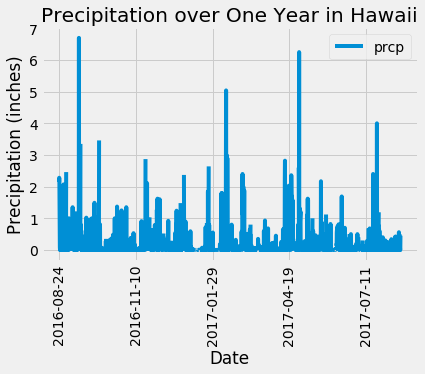

In [16]:
# Create Plot(s)
prcp_anal_df.plot(rot = 90)
plt.xlabel('Date')
plt.ylabel('Precipitation (inches)')
plt.title('Precipitation over One Year in Hawaii')
plt.savefig("histo_prcp_date.png")
plt.show()



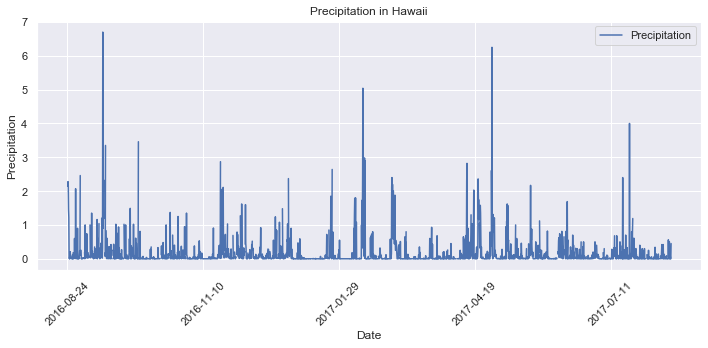

In [17]:
sns.set()

plot1 = prcp_anal_df.plot(figsize = (10, 5))

fig = plot1.get_figure()

plt.title('Precipitation in Hawaii')

plt.xlabel('Date')

plt.ylabel('Precipitation')

plt.legend(["Precipitation"],loc="best")

plt.xticks(rotation=45)

plt.tight_layout()

plt.savefig("Precipitation in Hawaii_bar.png")

plt.show()

In [18]:
prcp_anal_df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [19]:
# I wanted a range of precipitation amounts for plotting purposes...the code on line 3 and 4 and 5 didn't work

## prcp_anal.max_prcp = session.query(func.max(Measurement.prcp.filter(Measurement.date >= '2016-08-23' ))).\
## order_by(func.max(Items.UnitPrice * Items.Quantity).desc()).all()
## prcp_anal.max_prcp

prcp_anal_max_prcp = session.query(Measurement.prcp, func.max(Measurement.prcp)).\
    filter(Measurement.date >= '2016-08-23').\
    group_by(Measurement.date).\
    order_by(func.max(Measurement.prcp).asc()).all()
prcp_anal_max_prcp

# I initially did the following in a cell below.  Again, I wanted a range of prcp values for the year in our DataFrame 
# so here I got the min but realized both the min and the max, or both queries are useless to me here unless I were
# use plt.ylim in my plots, which I don't, I just allow the DF to supply its intrinsic values
# and both give identical results.  I will leave it here in thes assignment just to show my thought process

# prcp_anal_min_prcp = session.query(Measurement.prcp, func.min(Measurement.prcp)).\
#     filter(Measurement.date > '2016-08-23').\
#     group_by(Measurement.date).\
#     order_by(func.min(Measurement.prcp).asc()).all()
# prcp_anal_min_prcp

[(0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.01, 0.01),
 (0.01, 0.01),
 (0.01, 0.01),
 (0.01, 0.01),
 (0.01, 0.01),
 (0.01, 0.01),
 (0.01, 0.01),
 (0.01, 0.01),
 (0.01, 0.01),
 (0.01, 0.01),
 (0.01, 0.01),
 (0.01, 0.01),
 (0.01, 0.01),
 (0.01, 0.01),
 (0.01, 0.01),
 (0.01, 0.01),
 (0.02, 0.02),
 (0.02, 0.02),
 (0.02, 0.02),
 (0.02, 0.02),
 (0.02, 0.02),
 (0.02, 0.02),
 (0.02, 0.02),
 (0.02, 0.02),
 (0.02, 0.02),
 

***STATION ANALYSIS***.\
1) Design a query to calculate the total number of stations.\
2) Design a query to find the most active stations.\
3) List the stations and observation counts in descending order.\
4) Which station has the highest number of observations?.\
   Hint: You will need to use a function such as func.min, func.max, func.avg, and func.count in your queries..\
5) Design a query to retrieve the last 12 months of temperature observation data (TOBS)..\
6) Filter by the station with the highest number of observations..\
7) Plot the results as a histogram with bins=12.

In [20]:
Station = Base.classes.station

In [21]:
session = Session(engine)

In [22]:
# Getting column values from each table, here 'station'
columns = inspector.get_columns('station')
for c in columns:
    print(c)

{'name': 'id', 'type': INTEGER(), 'nullable': False, 'default': None, 'autoincrement': 'auto', 'primary_key': 1}
{'name': 'station', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'name', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'latitude', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'longitude', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'elevation', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}


In [23]:
# Get columns of 'measurement' table
columns = inspector.get_columns('measurement')
for c in columns:
    print(c)

{'name': 'id', 'type': INTEGER(), 'nullable': False, 'default': None, 'autoincrement': 'auto', 'primary_key': 1}
{'name': 'station', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'date', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'prcp', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'tobs', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}


In [24]:
engine.execute('Select * from station').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [25]:
# Design a query to show how many stations are available in this dataset?
session.query(Station.station).count()


9

In [26]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
# List the stations and the counts in descending order. Think about somehow using this from extra activity

Active_Stations = session.query(Station.station ,func.count(Measurement.tobs)).filter(Station.station == Measurement.station).\
group_by(Station.station).order_by(func.count(Measurement.tobs).desc()).all()

print(f"The most active station {Active_Stations[0][0]} has {Active_Stations[0][1]} observations!")


Active_Stations


The most active station USC00519281 has 2772 observations!


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [27]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
Station_Name = session.query(Station.name).filter(Station.station == Active_Stations[0][0]).all() 

print(Station_Name)

Temp_Stats = session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).\
             filter(Station.station == Active_Stations[0][0]).all()

print(Temp_Stats)

[('WAIHEE 837.5, HI US',)]
[(53.0, 87.0, 73.09795396419437)]


In [28]:
# Choose the station with the highest number of temperature observations.
Station_Name = session.query(Station.name).filter(Station.station == Active_Stations[0][0]).all() 
Station_Name


[('WAIHEE 837.5, HI US')]

In [29]:
# Query the last 12 months of temperature observation data for this station 
results_WAHIAWA = session.query(Measurement.date,Measurement.tobs).filter(Measurement.date > min_date).\
filter(Station.station == Active_Stations[0][0]).all()

results_WAHIAWA

[('2016-08-24', 79.0),
 ('2016-08-25', 80.0),
 ('2016-08-26', 79.0),
 ('2016-08-27', 77.0),
 ('2016-08-28', 78.0),
 ('2016-08-29', 78.0),
 ('2016-08-30', 79.0),
 ('2016-08-31', 80.0),
 ('2016-09-01', 81.0),
 ('2016-09-02', 80.0),
 ('2016-09-03', 79.0),
 ('2016-09-04', 75.0),
 ('2016-09-05', 79.0),
 ('2016-09-06', 76.0),
 ('2016-09-07', 76.0),
 ('2016-09-08', 80.0),
 ('2016-09-09', 79.0),
 ('2016-09-10', 78.0),
 ('2016-09-11', 76.0),
 ('2016-09-12', 78.0),
 ('2016-09-13', 78.0),
 ('2016-09-14', 75.0),
 ('2016-09-15', 79.0),
 ('2016-09-16', 80.0),
 ('2016-09-17', 79.0),
 ('2016-09-18', 81.0),
 ('2016-09-19', 77.0),
 ('2016-09-20', 77.0),
 ('2016-09-21', 78.0),
 ('2016-09-22', 76.0),
 ('2016-09-23', 82.0),
 ('2016-09-24', 81.0),
 ('2016-09-25', 78.0),
 ('2016-09-26', 80.0),
 ('2016-09-27', 80.0),
 ('2016-09-28', 79.0),
 ('2016-09-29', 80.0),
 ('2016-09-30', 80.0),
 ('2016-10-01', 80.0),
 ('2016-10-02', 79.0),
 ('2016-10-03', 79.0),
 ('2016-10-04', 79.0),
 ('2016-10-05', 80.0),
 ('2016-10-

In [30]:
# Make a DataFrame from the query results above showing dates and temp observation at the most active station
results_WAHIAWA_df = pd.DataFrame(results_WAHIAWA)

results_WAHIAWA_df

,date,tobs
0,2016-08-24,79.0
1,2016-08-25,80.0
2,2016-08-26,79.0
3,2016-08-27,77.0
4,2016-08-28,78.0
...,...,...
2218,2017-08-19,71.0
2219,2017-08-20,78.0
2220,2017-08-21,76.0
2221,2017-08-22,76.0


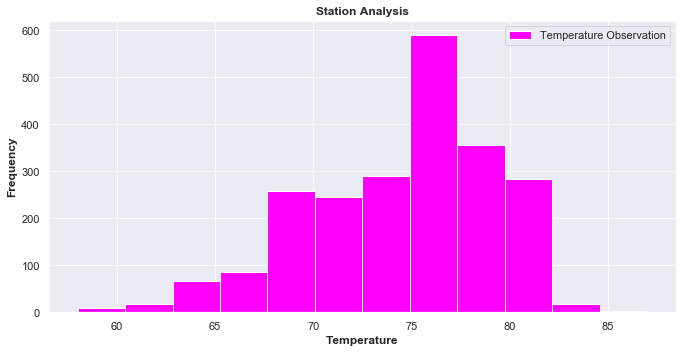

In [31]:
# Plot the results as a histogram

sns.set()

plt.figure(figsize=(10,5))

plt.hist(results_WAHIAWA_df['tobs'],bins=12,color='magenta')

plt.xlabel('Temperature',weight='bold')

plt.ylabel('Frequency',weight='bold')

plt.title('Station Analysis',weight='bold')

plt.legend(["Temperature Observation"],loc="best")

plt.savefig("Station_Analysis_hist.png")

plt.show()

## Bonus Challenge Assignment

In [32]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [33]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
calc_temps('2017-06-22', '2017-07-05')


[(71.0, 77.63855421686748, 87.0)]

In [34]:
# for your trip using the previous year's data for those same dates.
(calc_temps('2016-06-22', '2016-07-05'))

[(71.0, 76.93023255813954, 82.0)]

In [35]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [36]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [37]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [38]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [39]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [40]:
# Plot the daily normals as an area plot with `stacked=False`


## Step 2 - Climate App

Now that you have completed your initial analysis, design a Flask API based on the queries that you have just developed.

* Use Flask to create your routes.

### Routes

* `/`

  * Home page.

  * List all routes that are available.

* `/api/v1.0/precipitation`

  * Convert the query results to a dictionary using `date` as the key and `prcp` as the value.

  * Return the JSON representation of your dictionary.

* `/api/v1.0/stations`

  * Return a JSON list of stations from the dataset.

* `/api/v1.0/tobs`
  * Query the dates and temperature observations of the most active station for the last year of data.
  
  * Return a JSON list of temperature observations (TOBS) for the previous year.

* `/api/v1.0/<start>` and `/api/v1.0/<start>/<end>`

  * Return a JSON list of the minimum temperature, the average temperature, and the max temperature for a given start or start-end range.

  * When given the start only, calculate `TMIN`, `TAVG`, and `TMAX` for all dates greater than and equal to the start date.

  * When given the start and the end date, calculate the `TMIN`, `TAVG`, and `TMAX` for dates between the start and end date inclusive.

## Hints

* You will need to join the station and measurement tables for some of the queries.

* Use Flask `jsonify` to convert your API data into a valid JSON response object.

- - -



In [41]:
import numpy as np

import datetime as dt
from datetime import timedelta, datetime

import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, distinct, text, desc

from flask import Flask, jsonify


#################################################
# Database Setup
#################################################
#engine = create_engine("sqlite:///Resources/hawaii.sqlite")
engine = create_engine("sqlite:///Resources/hawaii.sqlite?check_same_thread=False")
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save reference to the table
Measurement = Base.classes.measurement
Station = Base.classes.station

#################################################
# Flask Setup
#################################################
app = Flask(__name__)


#################################################
# Flask Routes
#################################################

@app.route("/")
def welcome():
    """List all available api routes."""
    return (
        f"Available Routes:<br/>"
        f"/api/v1.0/precipitation<br/>"
        f"/api/v1.0/stations<br/>"
        f"/api/v1.0/tobs<br/>"
        f"/api/v1.0/<br/>"
        f"/api/v1.0/"
    )


@app.route("/api/v1.0/precipitation")
def precipitation():
    # Create our session (link) from Python to the DB
    session = Session(engine)

    """Return a list of all precipitation data"""
    # Query Precipitation data
    annual_rainfall = session.query(Measurement.date,  Measurement.prcp).order_by(Measurement.date).all()

    session.close()

    # Convert list of tuples into normal list
    all_rain = dict(annual_rainfall)

    return jsonify(all_rain)

@app.route("/api/v1.0/stations")
def precipitation():
    # Create our session (link) from Python to the DB
    session = Session(engine)

    """Return a list of all precipitation data"""
    # Query Precipitation data
    annual_rainfall = session.query(Measurement.date,  Measurement.prcp).order_by(Measurement.date).all()

    session.close()

    # Convert list of tuples into normal list
    all_rain = dict(annual_rainfall)

    return jsonify(all_rain)

@app.route("/api/v1.0/stations")
def stations():
    # Create our session (link) from Python to the DB
    session = Session(engine)

    """Return a list of all stations data"""
    # Query all passengers
    results = session.query(Station.station).all()

    session.close()

    # Convert list of tuples into normal list
    stations = list(np.ravel(results))

    return jsonify(stations)

@app.route("/api/v1.0/tobs")
def tobs():
    # Create our session (link) from Python to the DB
    session = Session(engine)

    """Return a list of all tobs data"""
    # Query the dates and temperature observations of the most active station for the last year of data.
    # Return a JSON list of temperature observations (TOBS) for the previous year.

    results_WAHIAWA = session.query(Measurement.date,Measurement.tobs).filter(Measurement.date >= "2016-8-23").\
    filter(Station.station == Active_Stations[0][0]).all()

    session.close()

    return jsonify(tobs)


if __name__ == '__main__':
    app.run(debug=True)

AssertionError: View function mapping is overwriting an existing endpoint function: precipitation